In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
import matplotlib.pyplot as plt

In [2]:
(train_images,train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

170498071/170498071 [==============================] - 5s 0us/step


In [3]:
print("Training data shape:",train_images.shape)
print("Test data shape:",test_images.shape)

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [5]:
num_classes = len(set(train_labels.flatten()))
print("Number of classes: ",num_classes)

Number of classes:  10


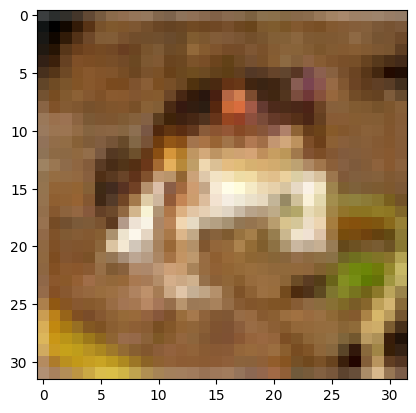

In [6]:
plt.imshow(train_images[0],cmap='gray')

In [7]:
train_images = train_images.astype('float32') /255
test_images = test_images.astype('float32') / 255

In [8]:
train_labels = tf.keras.utils.to_categorical(train_labels,num_classes)
test_labels = tf.keras.utils.to_categorical(test_labels,num_classes)

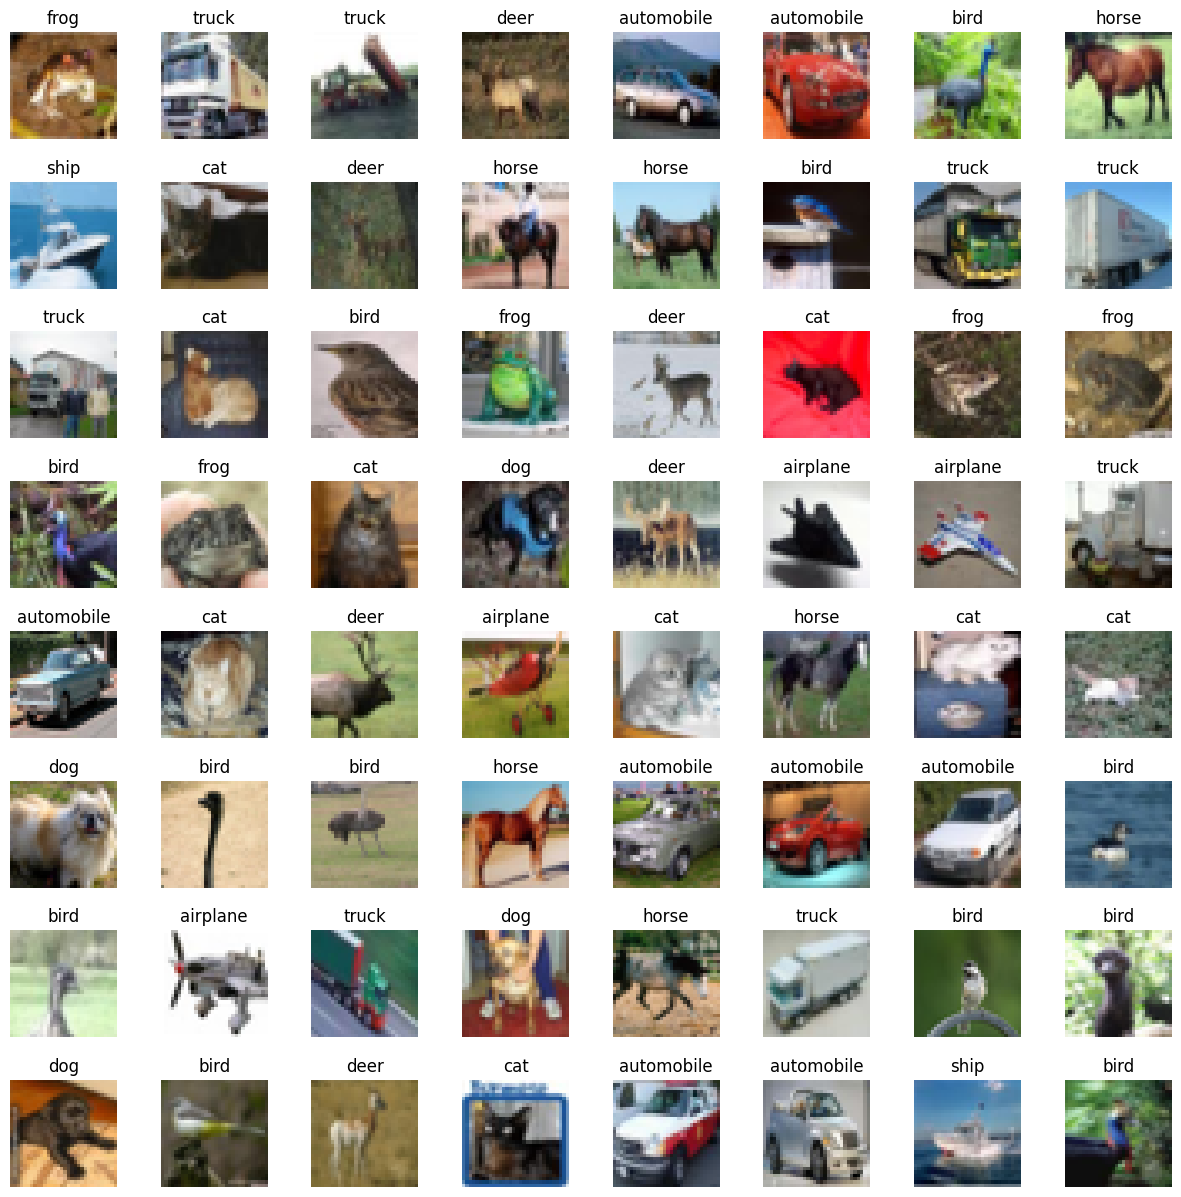

In [9]:
class_names = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

fig,axes = plt.subplots(nrows=8,ncols=8,figsize=(15,15),sharex=True,sharey=True)

for i,(image,label) in enumerate(zip(train_images[:64],train_labels[:64])):
  row = i // 8
  col = i % 8
  ax = axes[row,col]
  ax.imshow(image)
  ax.set_title(class_names[label.argmax()],fontsize = 12)
  ax.axis('off')

plt.subplots_adjust(wspace=0.4,hspace = 0.4)
plt.show()


In [11]:
model = models.Sequential()
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same' ,input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(256,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Conv2D(512,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same'))
model.add(BatchNormalization())
model.add(Conv2D(512,(3,3),activation = 'relu',kernel_initializer ='he_uniform',padding = 'same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(2048,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(1024,activation = 'relu',kernel_initializer = 'he_uniform'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(10,activation = 'softmax'))

In [12]:
model.compile(optimizer = 'adam',loss = 'categorical_crossentropy',metrics=['accuracy'])

In [ ]:
#model.fit(train_images,train_labels,epochs=250,batch_size = 64,validation_data =(test_images,test_labels) )

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#model.save('/content/drive/Mydrive/cifar10_model.h5')

In [15]:
from tensorflow.keras.models import  load_model
model = load_model('/content/drive/MyDrive/cifar10_model.h5')

In [17]:
test_loss,test_acc = model.evaluate(test_images,test_labels)
print(f'Test loss:{test_loss},Test accuracy:{test_acc}')

313/313 [==============================] - 11s 11ms/step - loss: 0.6116 - accuracy: 0.8804
Test loss:0.6116482615470886,Test accuracy:0.8804000020027161


In [19]:
from tensorflow.keras.preprocessing import image
import numpy as np

image_path = '/content/drive/MyDrive/Pictures for Object detection/frog.jpeg'
img = image.load_img(image_path,target_size=(32,32))

In [20]:
img_array = image.img_to_array(img)

In [21]:
img_array = np.expand_dims(img_array,axis=0)

In [22]:
img_array = img_array.astype('float32') / 255


In [25]:
predictions = model.predict(img_array)

1/1 [==============================] - 1s 757ms/step


In [26]:
predictions

array([[2.2620089e-12, 7.3043050e-16, 1.5816010e-10, 7.6143501e-12,
        3.6589425e-12, 2.3535115e-13, 1.0000000e+00, 7.0939775e-14,
        4.8781194e-13, 9.9371995e-12]], dtype=float32)

In [28]:
prediceted_class_index = np.argmax(predictions)
predicted_class = class_names[prediceted_class_index]

In [29]:
print("Predicted class:",predicted_class)

Predicted class: frog
